# 🗳️ Análisis temático de publicaciones políticas en Reddit Argentina (r/argentina) con clasificación automática mediante GPT

# 🎯 Objetivo:

Explorar los temas más discutidos relacionados con política argentina en Reddit a través del análisis de publicaciones históricas del subreddit r/argentina.

Introducción:

Se aplicaron técnicas de web scraping, procesamiento de texto, y clasificación semántica usando el modelo GPT-3.5-turbo para identificar menciones a figuras políticas (como Milei, Macri, Cristina, etc.). Se visualizaron patrones de frecuencia y evolución temporal de estas menciones.

✅ Paso 1: Scraping de Reddit

Scrapeamos los últimos 2000 posts del subreddit r/argentina.

In [ ]:
import praw
import pandas as pd

reddit = praw.Reddit(
    client_id='YOUR_CLIENT_ID',
    client_secret='YOUR_CLIENT_SECRET',
    user_agent='script:your-app-name (by u/your_reddit_username)',
    check_for_async=False
)

subreddit = reddit.subreddit('argentina')
posts = []

for post in subreddit.top(limit=2000):
    posts.append({
        "title": post.title,
        "score": post.score,
        "comments": post.num_comments,
        "created": post.created_utc,
        "url": post.url,
        "selftext": post.selftext
    })

df = pd.DataFrame(posts)
df.to_csv("posts_argentina.csv", index=False)


✅ Paso 2: Clasificación con GPT-3.5-Turbo

GPT clasifica cada post según figuras políticas

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="TU_API_KEY_AQUI")

entidades = []

for i, titulo in enumerate(df["title"].dropna().head(2000)):
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                      {
                        "role": "user",
                        "content": f"""
                      Identificá a qué político argentino hace referencia este título de Reddit.
                      Respondé únicamente con **una sola palabra** y sin ningún punto:
                      `milei`, `massa`, `bullrich`, `cristina`, `macri`, `otro`, `ninguno`.

                      Título: "{titulo}"
                      """
                      }
            ]
        )
        entidad = response.choices[0].message.content.strip().lower()
        entidades.append(entidad)
        print(f"{i+1}. {entidad}")
    except Exception as e:
        print(f"❌ Error en post {i+1}: {e}")
        entidades.append("error")




1. macri
2. ninguno
3. milei
4. milei
5. ninguno
6. ninguno
7. bullrich
8. **milei**
9. milei
10. macri
11. milei
12. macri
13. milei
14. **milei**
15. macri
16. ninguno
17. milei
18. ninguno
19. bullrich
20. milei
21. milei
22. milei
23. ninguno
24. ninguno
25. macri
26. milei
27. ninguno
28. milei
29. cristina
30. ninguno
31. ninguno
32. ninguno
33. milei
34. ninguno
35. milei
36. milei
37. milei
38. milei
39. ninguno
40. macri
41. macri
42. macri
43. ninguno
44. macri
45. ninguno
46. **macri**
47. massa
48. milei
49. ninguno
50. macri
51. milei
52. cristina
53. milei
54. ninguno
55. milei
56. macri
57. milei
58. milei
59. milei
60. macri
61. ninguno
62. milei
63. cristina
64. milei
65. milei
66. milei
67. cristina
68. macri
69. milei
70. ninguno
71. ninguno
72. macri
73. macri
74. milei
75. milei
76. ninguno
77. macri
78. ninguno
79. macri
80. ninguno
81. milei
82. ninguno
83. milei
84. ninguno
85. macri
86. milei
87. bullrich
88. cristina
89. ninguno
90. macri
91. cristina
92. mile

In [ ]:
print(len(df), len(entidades))


999 999


In [ ]:
# Asigno la columna al dataframe original
df["entidad"] = entidades


In [ ]:
df["fecha"] = pd.to_datetime(df["created"], unit="s")

df["entidad"] = df["entidad"].replace({
    "milei.": "milei",
    "milei ": "milei",
    "cristina kirchner": "cristina",
    "kirchner": "cristina",
    "bullrich.": "bullrich",
    "macri.": "macri",
    "massa": "massa",
    "larreta": "larreta",
    "ningúno": "ninguno",
    "otro": "ninguno",
    "error": "ninguno",
    "no se puede determinar": "ninguno",
    "no sé": "ninguno",
    "de nadie": "ninguno",
})



In [ ]:
# Pasamos todo a minúsculas, sin espacios y sin símbolos raros
df["entidad"] = df["entidad"].str.lower().str.strip()

df["entidad"] = df["entidad"].replace({
    "**milei**": "milei",
    "**cristina**": "cristina",
    "**macri**": "macri",
    "**ninguno**": "ninguno",
    "bulrrich": "bullrich",
    "\"massa\"": "massa",
    "fernández": "cristina",
    "maradona": "ninguno",
    "kicillof": "kicillof",
})


In [ ]:
print(df["entidad"].value_counts())


entidad
milei       339
ninguno     249
macri       242
cristina    105
bullrich     51
massa        13
Name: count, dtype: int64


✅ Paso 3: Visualización simple

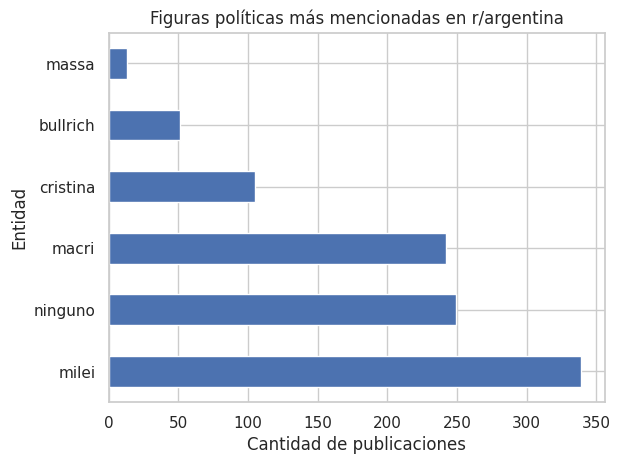

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conteo_entidades = df["entidad"].value_counts()

conteo_entidades.plot(kind="barh", title="Figuras políticas más mencionadas en r/argentina")
plt.xlabel("Cantidad de publicaciones")
plt.ylabel("Entidad")
plt.show()


# 🕒 Análisis temporal de menciones a Javier Milei
A partir de una muestra de 999 publicaciones del subreddit r/argentina clasificadas mediante inteligencia artificial, se observa que Javier Milei fue la figura política más mencionada durante el año electoral 2023.

Este gráfico muestra la evolución semanal de publicaciones relacionadas con Milei desde 2018 hasta la actualidad (2025), permitiendo visualizar picos de actividad coincidentes con momentos clave de su trayectoria.

🔍 La información fue extraída mediante scraping, clasificada con GPT-3.5 y filtrada por entidad política.

1. Filtramos solo publicaciones sobre Milei

In [ ]:
df_milei = df[df["entidad"] == "milei"]

2. Graficamos

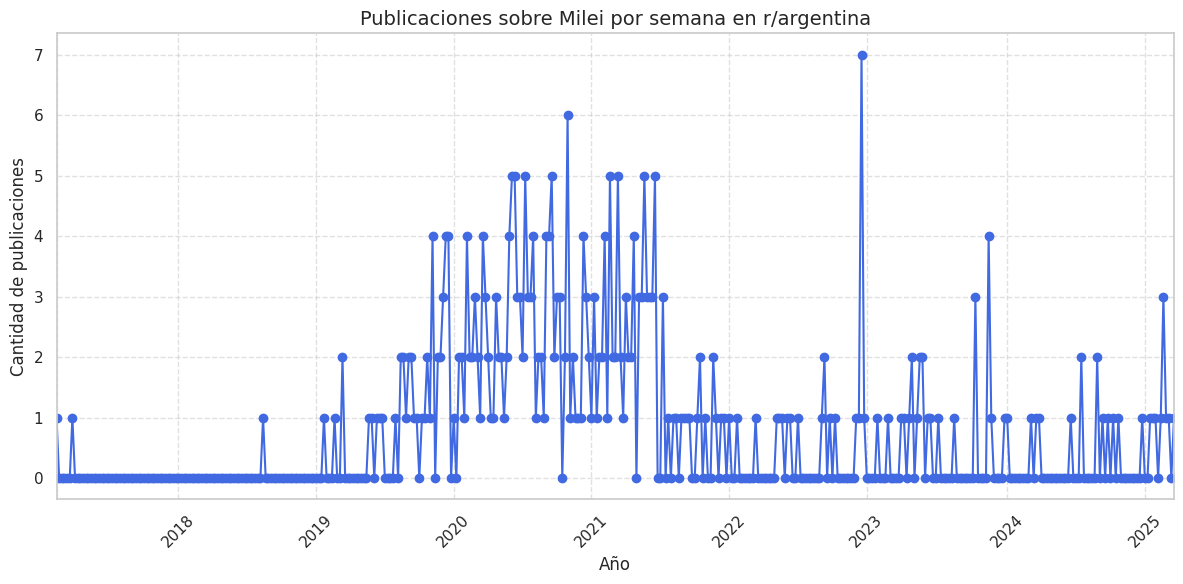

In [ ]:
conteo_semanal = df_milei.resample("W", on="fecha").size()

plt.figure(figsize=(12, 6))
conteo_semanal.plot(marker="o", linestyle="-", color="royalblue")

plt.title("Publicaciones sobre Milei por semana en r/argentina", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Cantidad de publicaciones", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()



🔍 Picos notables en el gráfico de menciones a Milei

📈 Pico fuerte en 2020-2021 (aprox. 5-6 publicaciones/semana)
→ Corresponde a su explosión mediática como figura disruptiva. En 2021 lanzó oficialmente su candidatura a diputado por CABA con La Libertad Avanza.

📈 Máximo histórico en principios de 2023 (7 publicaciones en una semana)
→ Muy probablemente asociado a:

La victoria de Milei en las PASO (agosto 2023).

Su consolidación como candidato presidencial serio.

Fuertes apariciones mediáticas o controversias.

📈 Rebrotes en 2024
→ Podrían ser menciones posteriores a su asunción como presidente (si fue electo), análisis de gestión, medidas económicas o temas polémicos recurrentes.